The PCA bit is in input box [7]

In [1]:
import numpy as np
from astropy.table import Table
from astropy.io import fits
import pyfits
from astropy.io import ascii 
import math
import scipy
from scipy.interpolate import splev, splrep
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.interpolate import SmoothSphereBivariateSpline
sns.set_style("white")

In [2]:
apcolumn=9
aperturecol=10+apcolumn*3
print 'Aperture Column is ', aperturecol
kernelchoice='b0i0d20'
pathway='/Users/msoares/Dropbox/K20/MYLC/'+ kernelchoice+'/HAT-264-0779160.rlc'
filesfound=glob.glob(pathway) #Grabs all the files
for i in range(0,1):#,len(filesfound)):
    filename=filesfound[i]
    print filename    
    data = np.loadtxt(filename, usecols = (0,1, 2, 3, 4, 5, aperturecol,11), dtype={'names': ('CAD', 'ID', 'RA1', 'DEC1', 'RA2', 'DEC2', 'Mag1', 'Err1'),'formats': ('f4', 'S15', 'f4', 'f4', 'f4','f4', 'S15', 'f4')})
    Cadence=data['CAD'] 
    print len(Cadence), 'total points'
    if len(Cadence) < 2319:
        print filename, 'ignored'
        continue
    Mag1=data['Mag1'] 
    Mag=[]
    for k in range(0,len(Mag1)):
        Mag1[k]=Mag1[k].replace("-","nan")
        Mag.append(np.float(Mag1[k]))
    flux_un=[] 
    flux=[]
    for i in range(0,len(Mag)):
        tmpval=10**(-0.4*Mag[i])
        flux_un.append(tmpval)
    medflux=np.nanmedian(flux_un)
    for c in range(0,len(flux_un)):
        flux.append(flux_un[c]/medflux)
    #####TIME CONVERSION DONE HERE FROM LOOKUP TABLE#############
    time=[0]*len(Cadence)
    lookupfile='/Users/msoares/Dropbox/K20/Notebooks/CADENCE_TIME.out'
    MyCad=np.genfromtxt(lookupfile, dtype=float, delimiter= ' ', usecols=0)    
    K2time=np.genfromtxt(lookupfile, dtype=float, delimiter= ' ', usecols=1)   
    for i in range(0,len(Cadence)):
        time[i]=K2time[Cadence[i]]
    ##########################################################
    RA2=data['RA2']
    DEC2=data['DEC2']
    ###########################################################
    print RA2[0:10]
    yx = zip(time, RA2)
    yx.sort()
    RA2_sort = [x for y, x in yx]
    print RA2_sort[0:10]
    print DEC2[0:10]
    yx = zip(time, DEC2)
    yx.sort()
    DEC2_sort = [x for y, x in yx]
    print DEC2_sort[0:10]
    yx = zip(time, Cadence)
    yx.sort()
    CAD_sort = [x for y, x in yx]
    print CAD_sort[0:10]
    yx = zip(time, flux)
    yx.sort()
    flux_sort = [x for y, x in yx]
    yx = zip(time, Mag)
    yx.sort()
    mag_sort = [x for y, x in yx]
    time_sort=sorted(time)
    del RA2
    del DEC2

Aperture Column is  37
/Users/msoares/Dropbox/K20/MYLC/b0i0d20/HAT-264-0779160.rlc
2326 total points
[ 695.05065918  695.0479126   695.07086182  694.99993896  695.03277588
  695.00390625  694.9453125   694.99182129  694.93426514  694.94116211]
[695.07086, 695.05066, 695.04791, 695.03278, 694.99994, 695.00391, 694.99182, 694.94531, 694.93427, 694.94116]
[ 928.86810303  928.87597656  928.88311768  928.83929443  928.86547852
  928.8505249   928.81359863  928.83996582  928.82659912  928.81414795]
[928.88312, 928.8681, 928.87598, 928.86548, 928.83929, 928.85052, 928.83997, 928.8136, 928.8266, 928.81415]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


/Users/msoares/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Mission #1: Just keep the second half of the data after the big jump
Second half of data is of better quality (~30 days worth of data) --Second half after the safe mode begins on cadence 89347 (our file 1912 and K2time in BJD of 1934.59427635)  --this corresponds to index 597
###"Safety Mode was in K2 Cadences 88198-89346"


723
1939.10872337 1.00594908514
723 :: Our Cadence Value= 2133 BJD= 1939.10872337 K2 Cadence= 89567
1603 total points


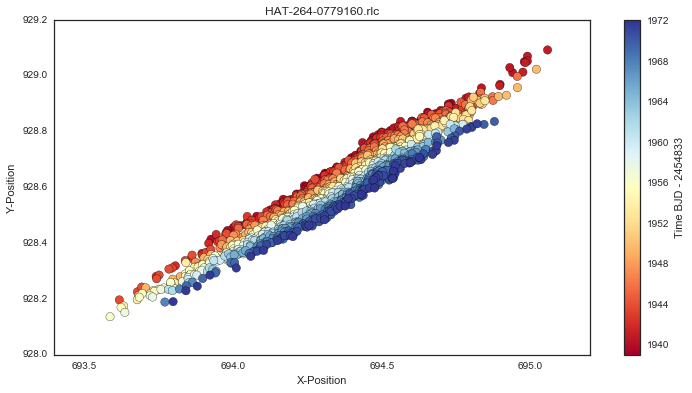

In [3]:
for i in range(0,len(CAD_sort)):
    if CAD_sort[i]>=2133:
        value=i
        print i
        break
value=723#568
print time_sort[value], flux_sort[value]
time_cull=time_sort[value:len(time_sort)]
RA_cull=RA2_sort[value:len(time_sort)]
DEC_cull=DEC2_sort[value:len(time_sort)]
flux_cull=flux_sort[value:len(time_sort)]
mag_cull=mag_sort[value:len(time_sort)]
Cadence_cull=CAD_sort[value:len(time_sort)]
plt.figure(figsize=(12, 6))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(RA_cull,DEC_cull, c=time_cull, vmin=min(time_cull), vmax=max(time_cull), cmap=cm, s=70)
plt.colorbar(sc,label='Time BJD - 2454833')
print value, ':: Our Cadence Value=',int(CAD_sort[value]), "BJD=",time_sort[value], 'K2 Cadence=',int(CAD_sort[value])+87434
print len(DEC_cull), 'total points'
plt.title(filename[-19:])
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()

Now we perform a quick 3.0-sigma clipping --compare this to thruster flags

In [4]:
#########################
sigmaval=3
#########################
shift=[]
time_diff=[]
for i in range(0,len(time_cull)-1):
    shift.append(np.sqrt((RA_cull[i]-RA_cull[i+1])**2+(DEC_cull[i]-DEC_cull[i+1])**2))
    time_diff.append(time_cull[i+1]-time_cull[i])
shift_sigma=[]
for y in range(0,len(shift)):
    shift_sigma.append(shift[y]/(np.nanmedian(shift)))
shift_diff=[]
for y in range(0,len(shift)):
    shift_diff.append((np.abs(shift[y]-(np.nanmedian(shift))))/(time_diff[y]/min(time_diff)))
print '1-sigma is outside', np.nanmedian(shift)-np.nanmedian(shift_diff), np.nanmedian(shift)+np.nanmedian(shift_diff)
print '2-sigma is outside', np.nanmedian(shift)-2*np.nanmedian(shift_diff), np.nanmedian(shift)+2*np.nanmedian(shift_diff)
print '\n', shift[0], shift_diff[0]
RA_cull2=RA_cull
DEC_cull2=DEC_cull
time_cull2=time_cull
flux_cull2=flux_cull
mag_cull2=mag_cull
Cadence_cull2=Cadence_cull
indices=[]
for i in range(0,len(shift)):
    if shift_diff[i]/np.nanmedian(shift_diff) >= sigmaval:
        indices.append(i)
RA_cull2=np.delete(RA_cull2, indices)
DEC_cull2=np.delete(DEC_cull2, indices)
time_cull2=np.delete(time_cull2,indices)
flux_cull2=np.delete(flux_cull2,indices)
mag_cull2=np.delete(mag_cull2,indices)
Cadence_cull2=np.delete(Cadence_cull2,indices)

1-sigma is outside 0.0422749193747 0.0788047259247
2-sigma is outside 0.0240100160997 0.0970696291997

0.0120101307385 0.0485291931155


723


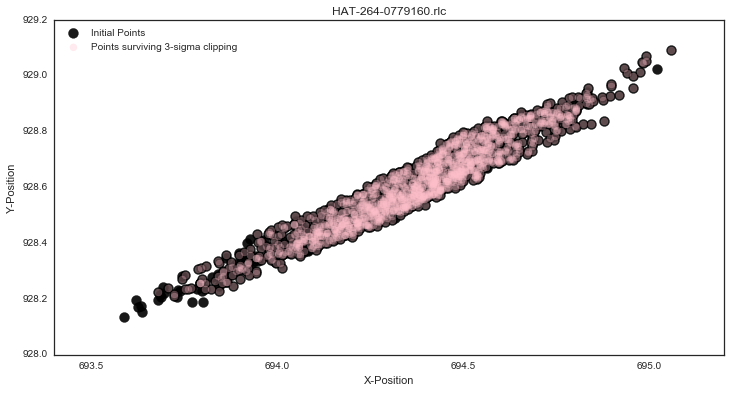

A total of 168 clipped sources
A total of  1603 points will be used in the detrending


In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(RA_cull,DEC_cull, color='black', s=100,alpha=0.9, label='Initial Points')
label='Points surviving '+str(sigmaval)+'-sigma clipping'
plt.scatter(RA_cull2,DEC_cull2, color='pink', s=50,alpha=0.3, label=label)
print value
plt.title(filename[-19:])
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.legend(loc='upper left')
plt.show()
print 'A total of', len(RA_cull)-len(RA_cull2), 'clipped sources'
print 'A total of ', len(RA_cull), 'points will be used in the detrending'

723


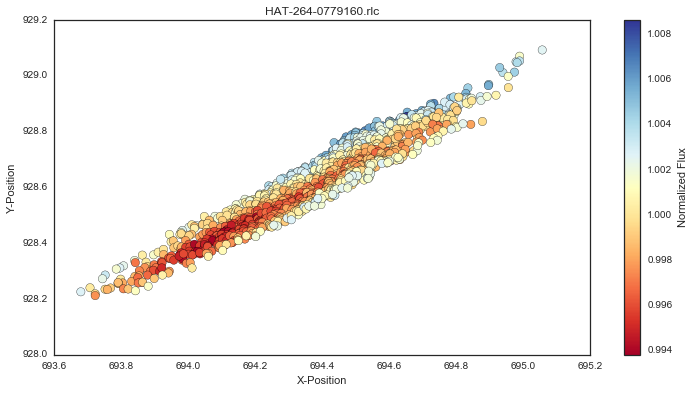

723


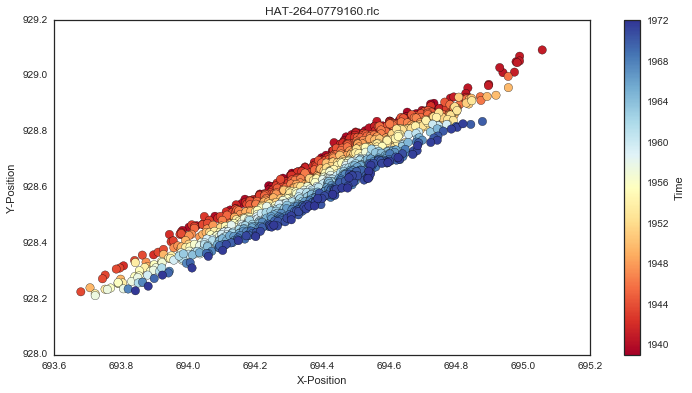

In [6]:
plt.figure(figsize=(12, 6))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(RA_cull2,DEC_cull2, c=flux_cull2, vmin=min(flux_cull2), vmax=max(flux_cull2), cmap=cm, s=70)
plt.colorbar(sc,label='Normalized Flux')
print value
plt.title(filename[-19:])
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()
plt.figure(figsize=(12, 6))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(RA_cull2,DEC_cull2, c=time_cull2, vmin=min(time_cull2), vmax=max(time_cull2), cmap=cm, s=70)
plt.colorbar(sc,label='Time')
print value
plt.title(filename[-19:])
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()

Perform PCA algorithm to transform to an orthogonal basis set of vectors

[(694.42596, 928.7088), (694.41522, 928.70343), (694.39764, 928.70618), (694.38068, 928.66852), (694.34009, 928.66028), (694.32593, 928.6554), (694.30933, 928.65094), (694.31458, 928.64685), (694.31146, 928.62921), (694.29956, 928.63019)]
[ 0.9819991   0.01800088]


(-1.25, 1.25)

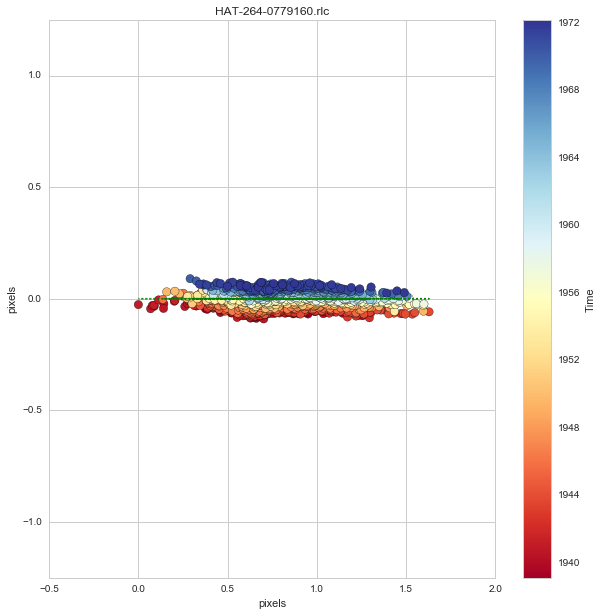

In [7]:
pca = PCA(n_components=2)
zipxy= zip(RA_cull2,DEC_cull2)
print zipxy[0:10]
pca.fit(zipxy)
print(pca.explained_variance_ratio_) 
transform_xy=pca.fit_transform(zipxy)
orthx=[]
orthy=[]
for d in range(0,len(RA_cull2)):
    orthx.append(transform_xy[d][0])
    orthy.append(transform_xy[d][1])
minorthxval=min(orthx)
for p in range(0,len(orthx)):
    orthx[p]=(orthx[p]-minorthxval)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sc = plt.scatter(orthx,orthy, c=time_cull2, vmin=min(time_cull2), vmax=max(time_cull2), cmap=cm, s=70)
plt.colorbar(sc,label='Time')
fit = np.polyfit(orthx,orthy,1)
x_new=np.arange(-1,1)
y_new = np.polyval(fit,orthx)
plt.plot(orthx,y_new,color='green',linestyle='dotted')

plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title(filename[-19:])
plt.xlim(-0.5,2)
plt.ylim(-1.25,1.25)

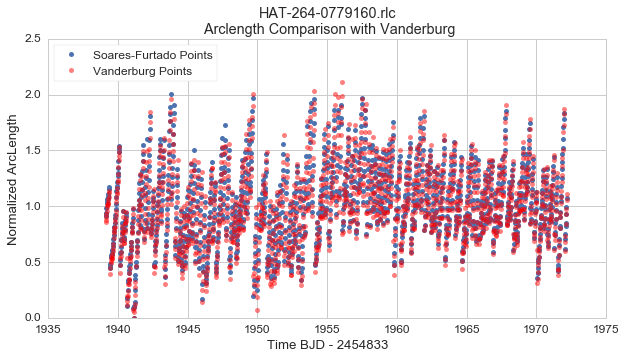

In [8]:
#Compare with Vanderburg
Vanfile='/Users/msoares/Dropbox/K20/Notebooks/hlsp_k2sff_k2_lightcurve_202060610-c00_kepler_v1_llc.fits'
hdulist = fits.open(Vanfile)
hdulist_HEADER=pyfits.open(Vanfile)
prihdr_HEAD=hdulist_HEADER[1].data
cols = hdulist[1].columns
scidata = hdulist[1].data

ARCLENGTH=scidata['ARCLENGTH']
T=scidata['T']
FRAW=scidata['FRAW']
FCOR=scidata['FCOR']

ARC_norm = ARCLENGTH / np.median(ARCLENGTH) #np.linalg.norm(ARCLENGTH) #careful here
orthx_norm = orthx / np.median(orthx)# np.linalg.norm(orthx) #careful here
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
plt.plot(time_cull2,orthx_norm,'o',markersize=5,label="Soares-Furtado Points")
plt.plot(T,ARC_norm,'ro',markersize=5.0,alpha=0.5, label="Vanderburg Points")
plt.legend(loc='upper left',frameon=True)
plt.xlabel('Time BJD - 2454833')
plt.ylabel('Normalized ArcLength')
plottitle=filename[-19:]+'\n Arclength Comparison with Vanderburg'
plt.title(plottitle)


Fitting a 5th-order Polynomial --not certain why yet..

(-1.25, 1.25)

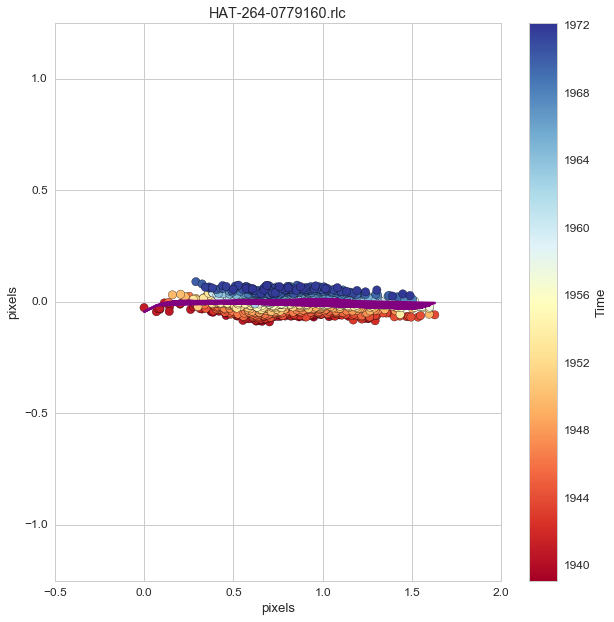

In [9]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sc = plt.scatter(orthx,orthy, c=time_cull2, vmin=min(time_cull2), vmax=max(time_cull2), cmap=cm, s=70)
plt.colorbar(sc,label='Time')
fit2 = np.polyfit(orthx,orthy,5)
x_new2=np.arange(-0.5,2.5)
y_new2 = np.polyval(fit2,orthx)
plt.plot(orthx,y_new2,color='purple')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title(filename[-19:])
plt.xlim(-0.5,2)
plt.ylim(-1.25,1.25)

Brightness vs. Arclength Comparison

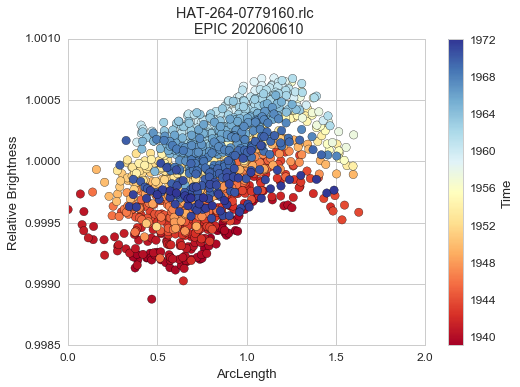

In [10]:
mag_cull2_norm=mag_cull2/np.nanmedian(mag_cull2)
sc = plt.scatter(orthx,mag_cull2_norm, c=time_cull2, vmin=min(time_cull2), vmax=max(time_cull2), cmap=cm, s=70)
plt.colorbar(sc,label='Time')
plt.ylabel('Relative Brightness')
plt.xlabel('ArcLength')
plt.ylim(0.9985,1.001)
plt.xlim(0,2)
titlename=filename[-19:]+ ' \n EPIC 202060610'
plt.title(titlename)
plt.show()


I know for any given time, I know the arclength and I know for any give arclength the relative brightness. 
I therefore know the brightness variation associated with any given value t.

In [11]:
numbins=25
binsize=(max(orthx)-min(orthx))/numbins
print binsize
print 'from 0 to', max(orthx), '\n'
#for i in range (0,numbins):
    #print 'bin', i, (min(orthx))+i*binsize

#lets go bin by bin
median_mag=[0]*numbins
binorthx=[]
for ii in range(0,numbins): #ii is binning number
    tmp_array=[]
    for i in range(0,len(mag_cull2_norm)): #i is the data point
        if orthx[i] >= min(orthx)+ii*binsize and orthx[i]<min(orthx)+(ii+1)*binsize:
            tmp_array.append(mag_cull2_norm[i])
    median_mag[ii]=np.nanmedian(tmp_array)
    #print 'bin', ii, 'has a median value of ',median_mag[ii], len(tmp_array)
    binorthx.append((min(orthx)+ii*binsize))

0.0651115322113
from 0 to 1.62779 



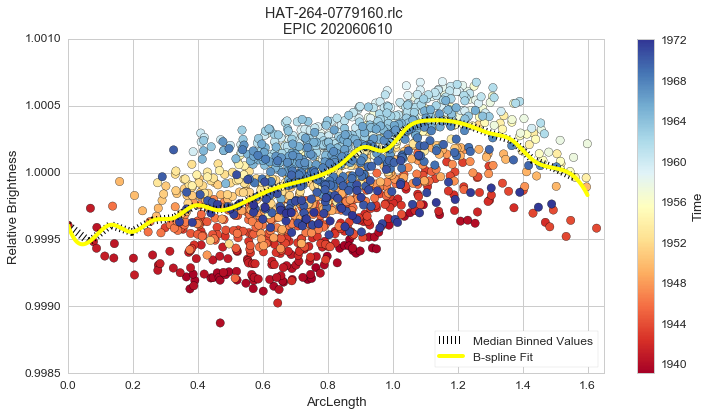

In [12]:
from scipy import signal
plt.figure(figsize=(12, 6))
mag_cull2_norm=mag_cull2/np.nanmedian(mag_cull2)
sc = plt.scatter(orthx,mag_cull2_norm, c=time_cull2, vmin=min(time_cull2), vmax=max(time_cull2), cmap=cm, s=70)
plt.plot(binorthx,median_mag,'black',linewidth=8,linestyle='dotted',label='Median Binned Values')
plt.colorbar(sc,label='Time')

tck = splrep(binorthx,median_mag)
smooth_orthx = np.linspace(0, 1.6, 8000)
smooth_mag_cull2_norm = splev(smooth_orthx, tck)
plt.plot(smooth_orthx,smooth_mag_cull2_norm,color='yellow',linewidth=4,label='B-spline Fit')


plt.ylabel('Relative Brightness')
plt.xlabel('ArcLength')
plt.ylim(0.9985,1.001)
plt.xlim(0,1.65)
titlename=filename[-19:]+ ' \n EPIC 202060610'
plt.title(titlename)
plt.legend(loc='lower right',frameon=True)
plt.show()

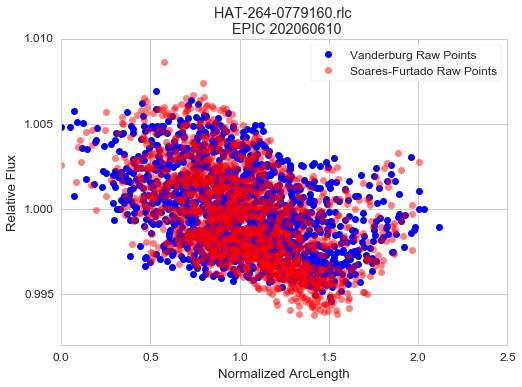

In [13]:
plt.plot(ARC_norm,FRAW,'bo',label='Vanderburg Raw Points')
plt.plot(orthx_norm,flux_cull2,'ro',alpha=0.5,label='Soares-Furtado Raw Points')
plt.ylabel('Relative Flux')
plt.xlabel('Normalized ArcLength')
titlename=filename[-19:]+ ' \n EPIC 202060610'
plt.title(titlename)
plt.legend(loc='upper right',frameon=True)
plt.show()

Let us try to just detrend now...

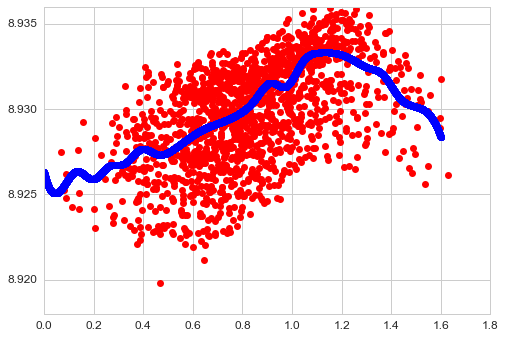

In [14]:
#Actual Polynomial Fit --not normalized
plt.plot(orthx,mag_cull2,'ro')
numbins=25
binsize=(max(orthx)-min(orthx))/numbins

#lets go bin by bin
median_mag=[0]*numbins
binorthx=[]
for ii in range(0,numbins): #ii is binning number
    tmp_array=[]
    for i in range(0,len(mag_cull2)): #i is the data point
        if orthx[i] >= min(orthx)+ii*binsize and orthx[i]<min(orthx)+(ii+1)*binsize:
            tmp_array.append(mag_cull2[i])
    median_mag[ii]=np.nanmedian(tmp_array)
    #print 'bin', ii, 'has a median value of ',median_mag[ii], len(tmp_array)
    binorthx.append((min(orthx)+ii*binsize))

tck = splrep(binorthx,median_mag)
smooth_orthx = np.linspace(0, 1.6, 8000)
smooth_mag_cull2 = splev(smooth_orthx, tck)

plt.plot(smooth_orthx,smooth_mag_cull2,'bo')



In [20]:
smooth_flux_cull2=[]
smooth_flux_cull2_norm=[]
for i in range(0,len(smooth_mag_cull2)):
    smooth_flux_cull2.append(10**(-0.4*smooth_mag_cull2[i]))
for i in range(0,len(smooth_mag_cull2)):
    smooth_flux_cull2_norm.append(smooth_flux_cull2[i]/np.nanmedian(smooth_flux_cull2))

In [23]:
print smooth_flux_cull2_norm[0]
print flux_cull2[0]

1.00294955706
1.00594908514


In [24]:
def find_nearest(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return indices

flux_corrected=[] 
for i in range(0,len(flux_cull2)):
    timeval=time_cull2[i]
    indexval=find_nearest(smooth_orthx,orthx[i])
    newvalue=flux_cull2[i]/smooth_flux_cull2_norm[indexval]
    flux_corrected.append(newvalue)


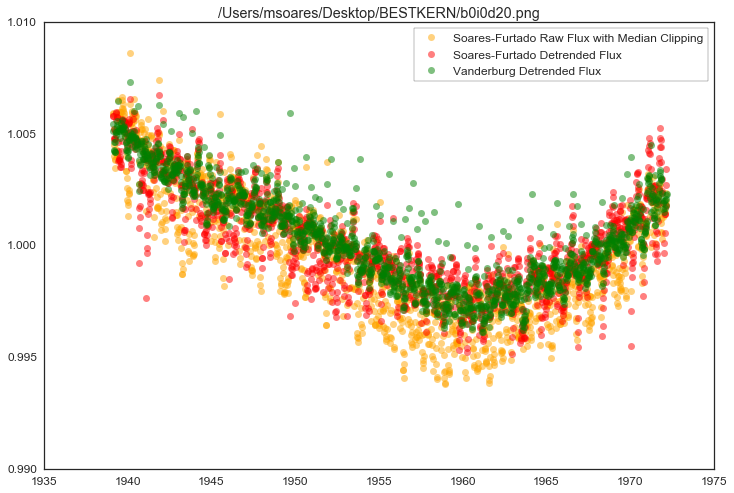

In [27]:
plt.figure(figsize=(12,8))
sns.set_style("white")
size=7

#plt.plot(T,FRAW,'o',color='blue',label='Vanderburg Raw Flux',markersize=size,alpha=0.5)
plt.plot(time_cull2,flux_cull2,'o', color='orange',label='Soares-Furtado Raw Flux with Median Clipping',markersize=size,alpha=0.5)
plt.plot(time_cull2,flux_corrected,'o',color='red',markersize=size,alpha=0.5, label='Soares-Furtado Detrended Flux')
plt.plot(T,FCOR,'o',color='green',label='Vanderburg Detrended Flux',markersize=size,alpha=0.5)

plt.legend(loc='upper right',frameon=True)
plt.xlim(1935,1975)
plt.ylim(0.99,1.01)
outfile='/Users/msoares/Desktop/BESTKERN/'+str(kernelchoice)+'.png'
plt.title(outfile)
plt.savefig(outfile)